Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


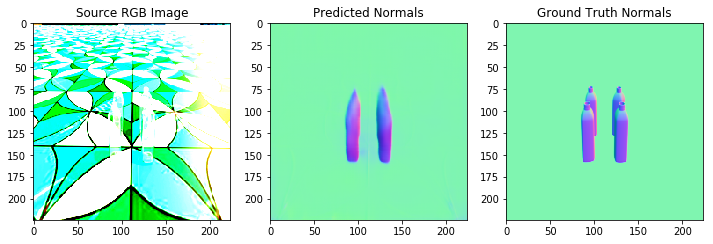

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


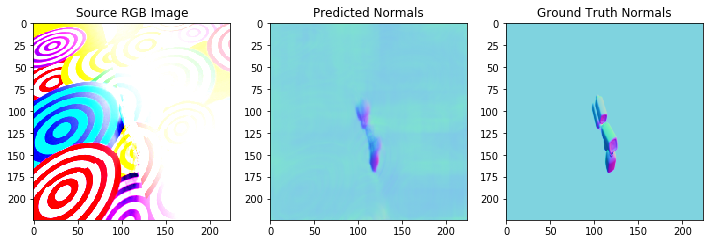

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


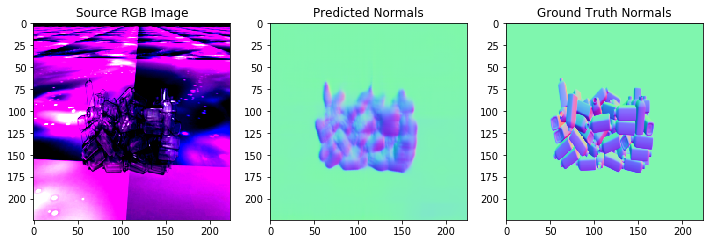

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


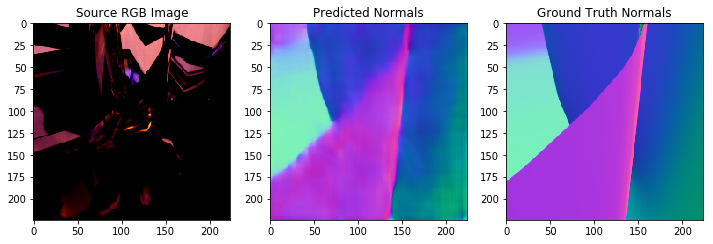

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


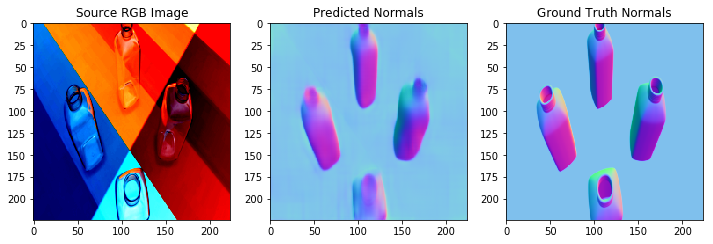

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


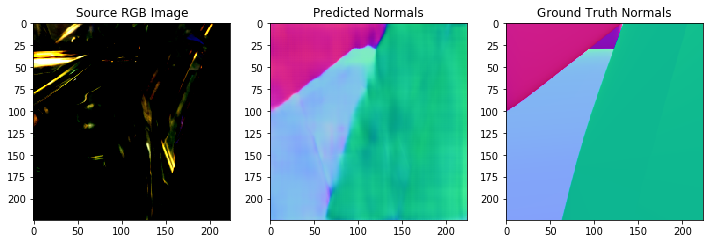

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


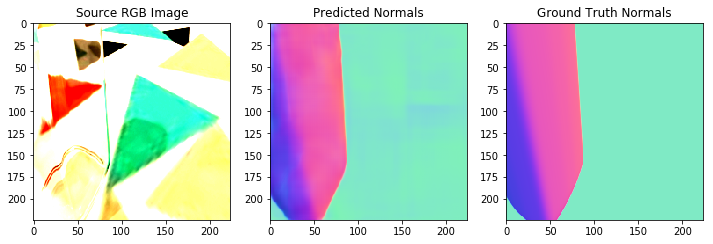

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


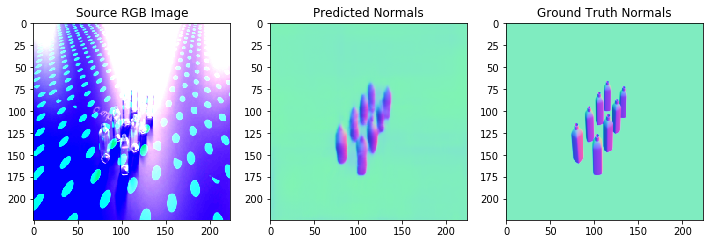

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


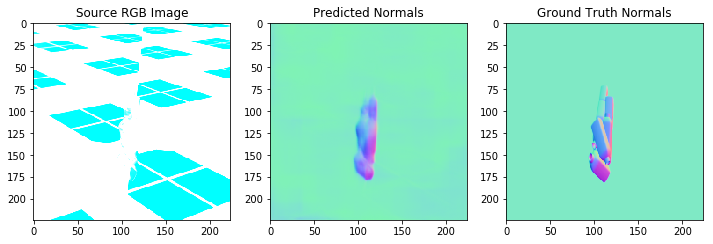

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


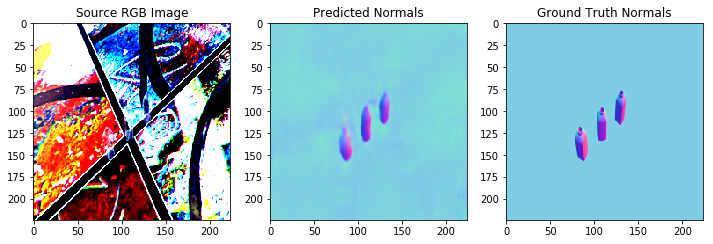

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


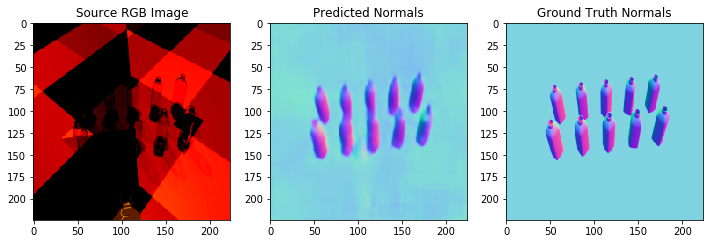

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


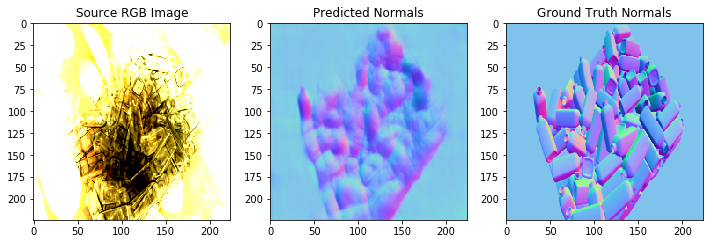

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


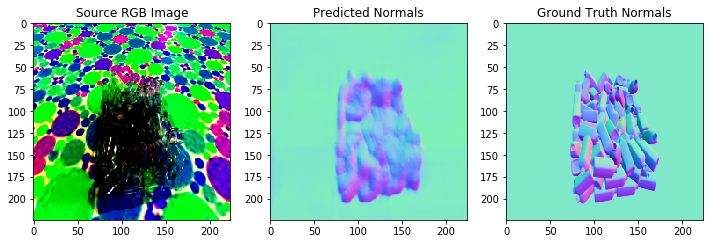

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


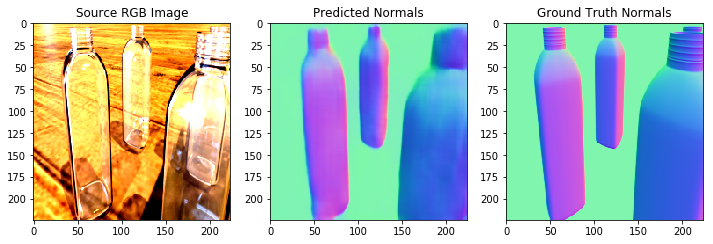

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


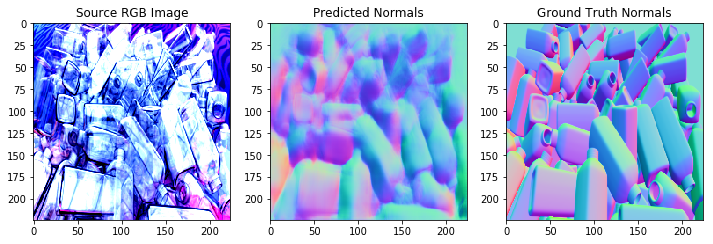

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


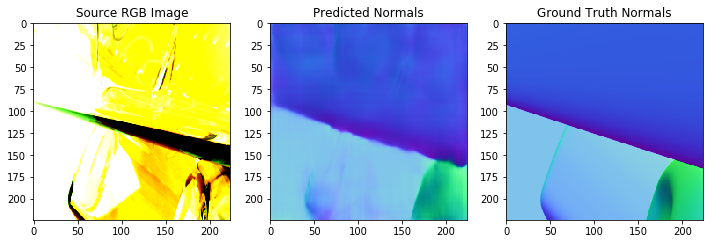

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


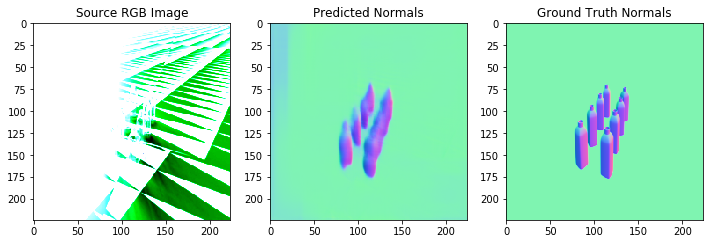

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


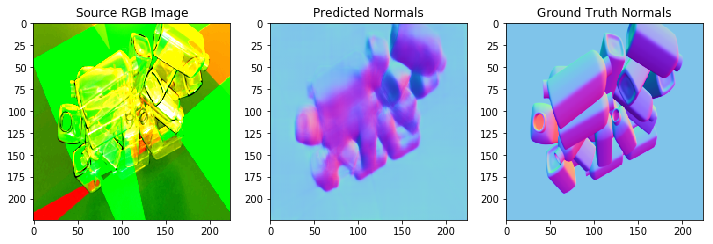

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


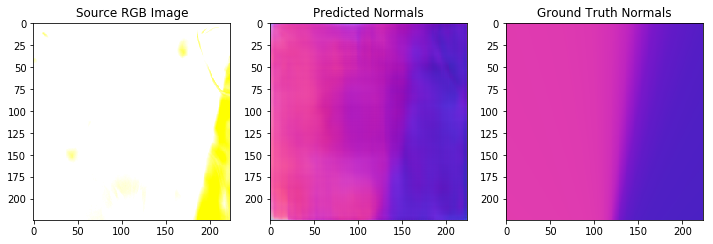

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


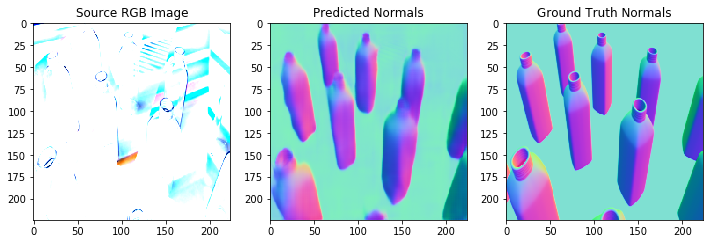

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


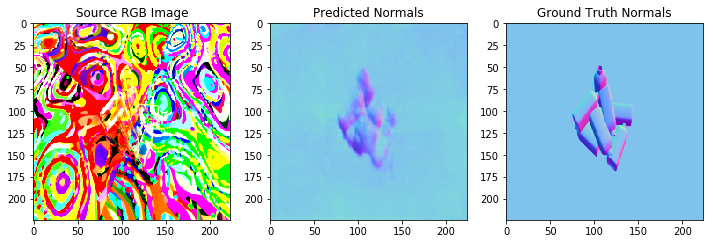

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


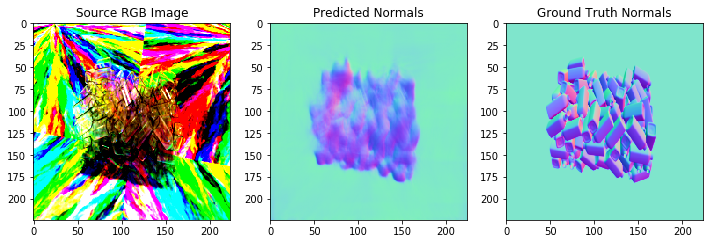

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


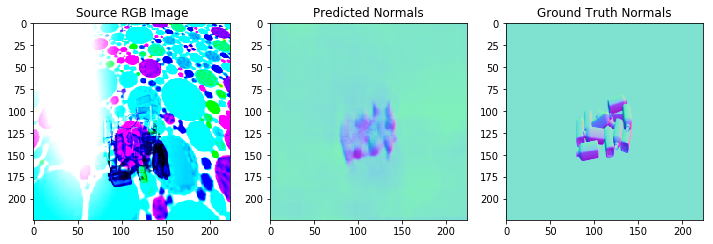

In [13]:
%matplotlib inline

import sys, os
from PIL import Image
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from torchvision import transforms
import models.unet_normals as unet
import numpy as np
from data_loader import Dataset,Options


class OPT():
    def __init__(self):
        self.dataroot = './data/'
        self.file_list = './data/datalist'
        self.batchSize = 1
        self.shuffle = False
        self.phase = 'eval'
        self.num_epochs = 1
        self.imsize = 224
        self.num_classes = int(3)
        self.gpu = '0'
        self.logs_path = 'logs/exp7'


###################### DataLoader #############################
opt = OPT()
dataloader = Dataset(opt)
device = torch.device("cuda:"+ opt.gpu if torch.cuda.is_available() else "cpu")

###################### ModelBuilder #############################
fcn = unet.Unet(num_classes=opt.num_classes)
checkpoint_path = opt.logs_path + '/checkpoints/checkpoint-ep_100-iter_39.pth'  # checkpoint-ep_75-iter_70.pth'
fcn.load_state_dict(torch.load(checkpoint_path))
fcn.to(device)
fcn.eval()
    

# Iterate over data.
for i in range(int(dataloader.size()/opt.batchSize)//100):
   
    # Get data
    inputs, labels =  dataloader.get_batch()
    img = inputs.to(device)

    # Inference
    res = fcn(img)
    res_norm = nn.functional.normalize(res, p=2, dim=1)
    output = res_norm.squeeze(0)
    output = output.data.cpu().numpy()

    
    ### Create Plots ##
    show_plots = True
    if (show_plots):
        # Orig image
        rgb_img = inputs[0].detach().cpu().numpy()
        rgb_img = np.transpose(rgb_img, (1,2,0))

        # Predicted Normals
        camera_normal_rgb = dataloader.normals_to_rgb_with_negatives(output)
        camera_normal_rgb = np.transpose(camera_normal_rgb, (1,2,0))

        # Ground Truth Normals
        truth_normal = labels[0].numpy().transpose(1,2,0)
        truth_normal_resized = truth_normal
        truth_normal_resized = dataloader.normals_to_rgb_with_negatives(truth_normal_resized)

        fig = plt.figure(figsize=(12,12))
        ax0 = plt.subplot(131)
        ax1 = plt.subplot(132)
        ax2 = plt.subplot(133)
        ax0.imshow(rgb_img)
        ax0.set_title('Source RGB Image') # subplot 211 title
        ax1.imshow(camera_normal_rgb)
        ax1.set_title('Predicted Normals')
        ax2.imshow(truth_normal_resized)
        ax2.set_title('Ground Truth Normals')
        plt.show()
        plt.close('all')



    ### Save Images ###
    save_images = False
    if (save_images):
        # Orig image
        plt.imsave('data/results/test-results/%09d-rgb.png'%(i), rgb_img)

        # Predicted Normals
        plt.imsave('data/results/test-results/%09d-normals.png'%(i), camera_normal_rgb)

        # Ground Truth Normals
        plt.imsave('data/results/test-results/%09d-normals-groundtruth.png'%(i), truth_normal_resized)
    
    

    